In [14]:
# ! pip install matplotlib pandas

In [15]:
from sqlalchemy import create_engine
import pandas as pd

In [16]:
user = "schedulin"
passw = "MySQLIsFun"
host = "35.231.228.133"
database = "schedulin"

# user = "schedulin_fgd"
# passw = "1234"
# host = "34.148.172.96"
# database = "schedulin"

In [17]:
db = create_engine(
    'mysql+pymysql://{0}:{1}@{2}/{3}' \
        .format(user, passw, host, database), \
    connect_args = {'connect_timeout': 10})
conn = db.connect()

In [18]:
timetable_df = pd.read_sql_table(
    "timetable",
    con = conn)
resource_df = pd.read_sql_table(
    "resource",
    con = conn)
user_df = pd.read_sql_table(
    "user",
    con = conn)
reservation_df = pd.read_sql_table(
    "reservation",
    con = conn)

In [19]:
timetable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 12 non-null     int64         
 1   start_time         12 non-null     object        
 2   end_time           12 non-null     object        
 3   creation_date      12 non-null     datetime64[ns]
 4   modification_date  12 non-null     datetime64[ns]
 5   deletion_date      0 non-null      datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(2)
memory usage: 704.0+ bytes


In [20]:
timetable_df.head()

,id,start_time,end_time,creation_date,modification_date,deletion_date
0,1,09:00,10:30,2022-11-03 16:20:09,2022-11-03 16:20:08,NaT
1,2,10:30,12:00,2022-11-03 16:20:09,2022-11-03 16:20:09,NaT
2,3,12:00,13:30,2022-11-03 16:20:09,2022-11-03 16:20:09,NaT
3,4,13:30,15:00,2022-11-03 16:20:09,2022-11-03 16:20:09,NaT
4,5,15:00,16:30,2022-11-03 16:20:09,2022-11-03 16:20:09,NaT


In [21]:
not_possible_times = \
    timetable_df["start_time"] >= timetable_df["end_time"]
timetable_df[not_possible_times]

,id,start_time,end_time,creation_date,modification_date,deletion_date


In [22]:
resource_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 14 non-null     int64         
 1   timetable_id       14 non-null     int64         
 2   type               14 non-null     object        
 3   description        14 non-null     object        
 4   max_pax            14 non-null     int64         
 5   price              14 non-null     float64       
 6   hours_in_advance   14 non-null     int64         
 7   creation_date      14 non-null     datetime64[ns]
 8   modification_date  14 non-null     datetime64[ns]
 9   deletion_date      0 non-null      datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(4), object(2)
memory usage: 1.2+ KB


In [23]:
resource_df.head()

,id,timetable_id,type,description,max_pax,price,hours_in_advance,creation_date,modification_date,deletion_date
0,1,1,PADEL,,4,0.50,12,2022-11-03 16:20:09,2022-11-03 16:20:11,NaT
1,2,2,PADEL,,4,0.75,24,2022-11-03 16:20:09,2022-11-03 16:20:11,NaT
2,3,3,PADEL,,4,0.75,24,2022-11-03 16:20:09,2022-11-03 16:20:11,NaT
3,4,4,PADEL,,4,1.75,2,2022-11-03 16:20:09,2022-11-03 16:20:11,NaT
4,5,5,PADEL,,4,0.75,12,2022-11-03 16:20:09,2022-11-03 16:20:12,NaT


In [24]:
resource_df["type"].value_counts()

PADEL         9
PISCINA       2
GIMNASIO      2
SALA COMUN    1
Name: type, dtype: int64

<AxesSubplot:>

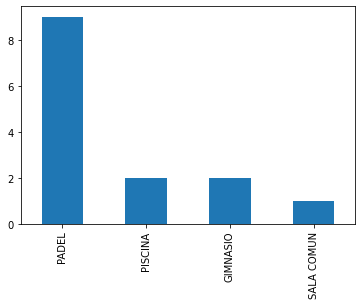

In [25]:
resource_df["type"].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='max_pax'>

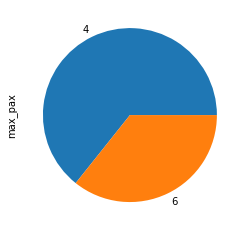

In [26]:
resource_df["max_pax"].value_counts().plot(kind = 'pie')

In [27]:
resource_df["price"].mean()

1.8571428571428572

In [28]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 380 non-null    int64         
 1   name               380 non-null    object        
 2   email              380 non-null    object        
 3   status             380 non-null    object        
 4   creation_date      380 non-null    datetime64[ns]
 5   modification_date  380 non-null    datetime64[ns]
 6   deletion_date      14 non-null     datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(3)
memory usage: 20.9+ KB


In [29]:
user_df.head()

,id,name,email,status,creation_date,modification_date,deletion_date
0,1,Sheila Brown,sheila.brown@mail.com,ACTIVE,2022-11-03 16:20:09,2022-11-03 16:20:14,NaT
1,2,Jessica Sparks,jessica.sparks@mail.com,ACTIVE,2022-11-03 16:20:09,2022-11-03 16:20:14,NaT
2,3,Jennifer Wilson,jennifer.wilson@mail.com,ACTIVE,2022-11-03 16:20:09,2022-11-03 16:20:14,NaT
3,4,Ethan Townsend,ethan.townsend@mail.com,ACTIVE,2022-11-03 16:20:09,2022-11-03 16:20:14,NaT
4,5,Daniel Wright,daniel.wright@mail.com,ACTIVE,2022-11-03 16:20:09,2022-11-03 16:20:15,NaT


<AxesSubplot:ylabel='status'>

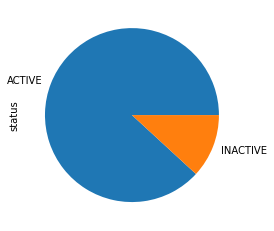

In [30]:
user_df["status"].value_counts().plot(kind = 'pie')

In [31]:
not_possible_situation = \
    (user_df["status"] == "ACTIVE") \
        & (user_df["deletion_date"] > '2012-01-01')
        
user_df[not_possible_situation]

,id,name,email,status,creation_date,modification_date,deletion_date


In [32]:
reservation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89151 entries, 0 to 89150
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 89151 non-null  int64         
 1   resource_id        89151 non-null  int64         
 2   user_id            89151 non-null  int64         
 3   start_time         89151 non-null  object        
 4   num_pax            89151 non-null  int64         
 5   status             89151 non-null  object        
 6   creation_date      89151 non-null  datetime64[ns]
 7   modification_date  89151 non-null  datetime64[ns]
 8   deletion_date      0 non-null      datetime64[ns]
 9   date               89151 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(4), object(2)
memory usage: 6.8+ MB


In [33]:
reservation_df.head()

,id,resource_id,user_id,start_time,num_pax,status,creation_date,modification_date,deletion_date,date
0,1,14,180,10:00:00,7,CONFIRMED,2022-11-03 20:12:12,2022-11-03 20:12:13,NaT,2017-01-28
1,2,10,37,10:00:00,1,CONFIRMED,2022-11-03 20:12:12,2022-11-03 20:12:13,NaT,2016-05-08
2,3,6,69,16:30:00,3,CONFIRMED,2022-11-03 20:12:12,2022-11-03 20:12:13,NaT,2015-05-17
3,4,3,116,12:00:00,5,CONFIRMED,2022-11-03 20:12:12,2022-11-03 20:12:13,NaT,2019-08-04
4,5,11,3,16:00:00,7,CONFIRMED,2022-11-03 20:12:12,2022-11-03 20:12:14,NaT,2018-11-21


<AxesSubplot:ylabel='status'>

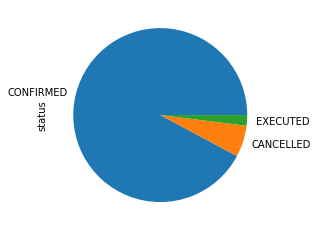

In [34]:
reservation_df["status"].value_counts().plot(kind = 'pie')

In [35]:
reservation_df["date"].value_counts().sort_index()

2012-11-04    11
2012-11-05     6
2012-11-06     7
2012-11-07     6
2012-11-08    11
              ..
2022-10-31    51
2022-11-01    56
2022-11-02    53
2022-11-03    59
2022-11-04    55
Name: date, Length: 3653, dtype: int64

<AxesSubplot:>

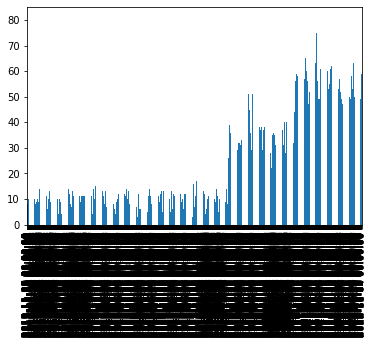

In [36]:
reservation_df["date"].value_counts().sort_index().plot(kind = 'bar')

<AxesSubplot:ylabel='num_pax'>

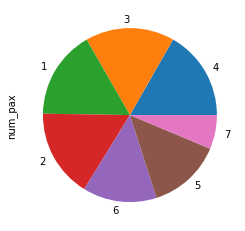

In [37]:
reservation_df["num_pax"].value_counts().plot(kind = 'pie')

In [38]:
timetable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 12 non-null     int64         
 1   start_time         12 non-null     object        
 2   end_time           12 non-null     object        
 3   creation_date      12 non-null     datetime64[ns]
 4   modification_date  12 non-null     datetime64[ns]
 5   deletion_date      0 non-null      datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(2)
memory usage: 704.0+ bytes


In [39]:
resource_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 14 non-null     int64         
 1   timetable_id       14 non-null     int64         
 2   type               14 non-null     object        
 3   description        14 non-null     object        
 4   max_pax            14 non-null     int64         
 5   price              14 non-null     float64       
 6   hours_in_advance   14 non-null     int64         
 7   creation_date      14 non-null     datetime64[ns]
 8   modification_date  14 non-null     datetime64[ns]
 9   deletion_date      0 non-null      datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(4), object(2)
memory usage: 1.2+ KB


In [40]:
reservation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89151 entries, 0 to 89150
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 89151 non-null  int64         
 1   resource_id        89151 non-null  int64         
 2   user_id            89151 non-null  int64         
 3   start_time         89151 non-null  object        
 4   num_pax            89151 non-null  int64         
 5   status             89151 non-null  object        
 6   creation_date      89151 non-null  datetime64[ns]
 7   modification_date  89151 non-null  datetime64[ns]
 8   deletion_date      0 non-null      datetime64[ns]
 9   date               89151 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(4), object(2)
memory usage: 6.8+ MB


In [41]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 380 non-null    int64         
 1   name               380 non-null    object        
 2   email              380 non-null    object        
 3   status             380 non-null    object        
 4   creation_date      380 non-null    datetime64[ns]
 5   modification_date  380 non-null    datetime64[ns]
 6   deletion_date      14 non-null     datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(3)
memory usage: 20.9+ KB


In [42]:
len(resource_df)

14

In [43]:
len(timetable_df)

12

In [44]:
merge_1_df = resource_df.merge(timetable_df, left_on = "timetable_id", right_on = "id", suffixes=["_res", "_tim"])\
    .drop(axis = 1, columns = [
        "creation_date_res", "modification_date_res", "id_tim"])\
    .rename(columns={"id_res": "resource_id"})

In [45]:
len(merge_1_df)

14

In [46]:
len(reservation_df)

89151

In [47]:
len(user_df)

380

In [48]:
merge_2_df = reservation_df.merge(user_df, left_on = "user_id", right_on = "id", suffixes=["_rva", "_use"])\
    .drop(axis = 1, columns = [
        "creation_date_rva", "modification_date_rva",
        "creation_date_use", "modification_date_use", "id_use"])\
    .rename(columns={"id_rva": "reservation_id"})

In [49]:
merge_3_df = merge_2_df.merge(merge_1_df, on = "resource_id",
                    suffixes = ["_rva", ""])\
    .drop(axis = 1, columns = [
        "deletion_date_rva", "deletion_date_res",
        "deletion_date_tim"])

In [50]:
merge_3_df.head()

,reservation_id,resource_id,user_id,start_time_rva,num_pax,status_rva,date,name,email,status_use,...,timetable_id,type,description,max_pax,price,hours_in_advance,start_time,end_time,creation_date_tim,modification_date_tim
0,1,14,180,10:00:00,7,CONFIRMED,2017-01-28,Rachel Sloan,rachel.sloan@mail.com,ACTIVE,...,10,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10
1,11963,14,180,10:00:00,6,CONFIRMED,2014-04-28,Rachel Sloan,rachel.sloan@mail.com,ACTIVE,...,10,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10
2,17802,14,180,10:00:00,7,CONFIRMED,2022-02-15,Rachel Sloan,rachel.sloan@mail.com,ACTIVE,...,10,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10
3,20101,14,180,10:00:00,6,CONFIRMED,2021-07-19,Rachel Sloan,rachel.sloan@mail.com,ACTIVE,...,10,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10
4,31517,14,180,10:00:00,7,CONFIRMED,2021-01-06,Rachel Sloan,rachel.sloan@mail.com,ACTIVE,...,10,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10


In [51]:
merge_3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89151 entries, 0 to 89150
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   reservation_id         89151 non-null  int64         
 1   resource_id            89151 non-null  int64         
 2   user_id                89151 non-null  int64         
 3   start_time_rva         89151 non-null  object        
 4   num_pax                89151 non-null  int64         
 5   status_rva             89151 non-null  object        
 6   date                   89151 non-null  datetime64[ns]
 7   name                   89151 non-null  object        
 8   email                  89151 non-null  object        
 9   status_use             89151 non-null  object        
 10  deletion_date_use      3212 non-null   datetime64[ns]
 11  timetable_id           89151 non-null  int64         
 12  type                   89151 non-null  object        
 13  d

In [52]:
merge_3_df["start_time_rva"] = merge_3_df["start_time_rva"].astype(str).str.slice(start = 0, stop = -3)

In [53]:
problems_with_start_times = (
    merge_3_df["start_time_rva"] != merge_3_df["start_time"]
)

In [54]:
results_with_start_time_problems_df = merge_3_df[problems_with_start_times]

In [55]:
results_with_start_time_problems_df.head()

,reservation_id,resource_id,user_id,start_time_rva,num_pax,status_rva,date,name,email,status_use,...,timetable_id,type,description,max_pax,price,hours_in_advance,start_time,end_time,creation_date_tim,modification_date_tim
795,30790,14,185,19:00,4,CONFIRMED,2020-12-05,Lisa Smith,lisa.smith@mail.com,ACTIVE,...,10,SALA COMUN,,6,5.00,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10
4979,11653,14,222,17:00,6,CONFIRMED,2022-02-21,Justin Chapman,justin.chapman@mail.com,ACTIVE,...,10,SALA COMUN,,6,5.00,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10
6654,43476,1,158,17:00,3,CONFIRMED,2016-07-20,Jessica Skinner,jessica.skinner@mail.com,ACTIVE,...,1,PADEL,,4,0.50,12,09:00,10:30,2022-11-03 16:20:09,2022-11-03 16:20:08
6787,53850,1,260,17:00,5,CONFIRMED,2020-10-14,Michael Brewer,michael.brewer@mail.com,ACTIVE,...,1,PADEL,,4,0.50,12,09:00,10:30,2022-11-03 16:20:09,2022-11-03 16:20:08
17434,60341,2,276,09:00,2,CANCELLED,2022-03-05,John Knight,john.knight@mail.com,INACTIVE,...,2,PADEL,,4,0.75,24,10:30,12:00,2022-11-03 16:20:09,2022-11-03 16:20:09


In [56]:
merge_3_df["start_time_rva"][problems_with_start_times] = merge_3_df["start_time"][problems_with_start_times]

c:\Users\frang\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
problems_with_pax = (
    merge_3_df["num_pax"] > merge_3_df["max_pax"]
)
results_with_pax_df = merge_3_df[problems_with_pax]

In [58]:
merge_3_df["num_pax"][problems_with_pax] = merge_3_df["max_pax"][problems_with_pax]

c:\Users\frang\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
user_with_deletion_df = merge_3_df[merge_3_df["deletion_date_use"].notnull()]

In [60]:
false_datetimes = \
    (user_with_deletion_df["date"] > \
        user_with_deletion_df["deletion_date_use"])
user_with_deletion_df[false_datetimes]

,reservation_id,resource_id,user_id,start_time_rva,num_pax,status_rva,date,name,email,status_use,...,timetable_id,type,description,max_pax,price,hours_in_advance,start_time,end_time,creation_date_tim,modification_date_tim
1364,660,14,10,10:00,1,CONFIRMED,2018-11-16,Jorge Santos,jorge.santos@mail.com,INACTIVE,...,10,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10
1365,3293,14,10,10:00,3,CONFIRMED,2022-06-23,Jorge Santos,jorge.santos@mail.com,INACTIVE,...,10,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10
1366,12278,14,10,10:00,5,CONFIRMED,2021-11-08,Jorge Santos,jorge.santos@mail.com,INACTIVE,...,10,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10
1367,14084,14,10,10:00,4,CONFIRMED,2019-03-01,Jorge Santos,jorge.santos@mail.com,INACTIVE,...,10,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10
1369,18347,14,10,10:00,6,CONFIRMED,2019-08-21,Jorge Santos,jorge.santos@mail.com,INACTIVE,...,10,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89112,49601,8,343,19:30,4,CONFIRMED,2021-12-16,Kevin Clark,kevin.clark@mail.com,INACTIVE,...,8,PADEL,,4,2.5,2,19:30,21:00,2022-11-03 16:20:09,2022-11-03 16:20:10
89113,58871,8,343,19:30,4,CONFIRMED,2022-05-04,Kevin Clark,kevin.clark@mail.com,INACTIVE,...,8,PADEL,,4,2.5,2,19:30,21:00,2022-11-03 16:20:09,2022-11-03 16:20:10
89114,82955,8,343,19:30,4,CONFIRMED,2020-06-03,Kevin Clark,kevin.clark@mail.com,INACTIVE,...,8,PADEL,,4,2.5,2,19:30,21:00,2022-11-03 16:20:09,2022-11-03 16:20:10
89115,85294,8,343,19:30,3,CANCELLED,2019-07-30,Kevin Clark,kevin.clark@mail.com,INACTIVE,...,8,PADEL,,4,2.5,2,19:30,21:00,2022-11-03 16:20:09,2022-11-03 16:20:10


In [61]:
# false_datetimes = \
#     (merge_3_df["date"] > \
#         merge_3_df["deletion_date_use"])

# merge_3_df[false_datetimes]['is_legit'] = False
# merge_3_df[~false_datetimes]['is_legit'] = True

import numpy as np

merge_3_df["is_legit"] = np.select([
    merge_3_df["date"] > \
        merge_3_df["deletion_date_use"]],
    [False],
    default = True
)

In [62]:
merge_3_df[merge_3_df['is_legit'] == False]

,reservation_id,resource_id,user_id,start_time_rva,num_pax,status_rva,date,name,email,status_use,...,type,description,max_pax,price,hours_in_advance,start_time,end_time,creation_date_tim,modification_date_tim,is_legit
1364,660,14,10,10:00,1,CONFIRMED,2018-11-16,Jorge Santos,jorge.santos@mail.com,INACTIVE,...,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10,False
1365,3293,14,10,10:00,3,CONFIRMED,2022-06-23,Jorge Santos,jorge.santos@mail.com,INACTIVE,...,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10,False
1366,12278,14,10,10:00,5,CONFIRMED,2021-11-08,Jorge Santos,jorge.santos@mail.com,INACTIVE,...,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10,False
1367,14084,14,10,10:00,4,CONFIRMED,2019-03-01,Jorge Santos,jorge.santos@mail.com,INACTIVE,...,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10,False
1369,18347,14,10,10:00,6,CONFIRMED,2019-08-21,Jorge Santos,jorge.santos@mail.com,INACTIVE,...,SALA COMUN,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89112,49601,8,343,19:30,4,CONFIRMED,2021-12-16,Kevin Clark,kevin.clark@mail.com,INACTIVE,...,PADEL,,4,2.5,2,19:30,21:00,2022-11-03 16:20:09,2022-11-03 16:20:10,False
89113,58871,8,343,19:30,4,CONFIRMED,2022-05-04,Kevin Clark,kevin.clark@mail.com,INACTIVE,...,PADEL,,4,2.5,2,19:30,21:00,2022-11-03 16:20:09,2022-11-03 16:20:10,False
89114,82955,8,343,19:30,4,CONFIRMED,2020-06-03,Kevin Clark,kevin.clark@mail.com,INACTIVE,...,PADEL,,4,2.5,2,19:30,21:00,2022-11-03 16:20:09,2022-11-03 16:20:10,False
89115,85294,8,343,19:30,3,CANCELLED,2019-07-30,Kevin Clark,kevin.clark@mail.com,INACTIVE,...,PADEL,,4,2.5,2,19:30,21:00,2022-11-03 16:20:09,2022-11-03 16:20:10,False


In [63]:
merge_3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89151 entries, 0 to 89150
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   reservation_id         89151 non-null  int64         
 1   resource_id            89151 non-null  int64         
 2   user_id                89151 non-null  int64         
 3   start_time_rva         89151 non-null  object        
 4   num_pax                89151 non-null  int64         
 5   status_rva             89151 non-null  object        
 6   date                   89151 non-null  datetime64[ns]
 7   name                   89151 non-null  object        
 8   email                  89151 non-null  object        
 9   status_use             89151 non-null  object        
 10  deletion_date_use      3212 non-null   datetime64[ns]
 11  timetable_id           89151 non-null  int64         
 12  type                   89151 non-null  object        
 13  d

In [64]:
# HACER UN LAG

merge_3_df["start_time_previous"] = merge_3_df.groupby(["user_id","date"])['start_time'].shift(1)

In [65]:
merge_3_df[["user_id", "date", "start_time", "end_time","start_time_previous"]]

,user_id,date,start_time,end_time,start_time_previous
0,180,2017-01-28,10:00,22:00,NaN
1,180,2014-04-28,10:00,22:00,NaN
2,180,2022-02-15,10:00,22:00,NaN
3,180,2021-07-19,10:00,22:00,NaN
4,180,2021-01-06,10:00,22:00,NaN
...,...,...,...,...,...
89146,97,2019-05-14,19:30,21:00,NaN
89147,97,2022-08-02,19:30,21:00,NaN
89148,97,2020-11-04,19:30,21:00,NaN
89149,97,2022-07-01,19:30,21:00,NaN


In [66]:
mask = merge_3_df["start_time_previous"].notnull()

merge_3_df[["user_id", "date", "start_time", "end_time","start_time_previous"]][mask]

,user_id,date,start_time,end_time,start_time_previous
298,155,2022-06-14,10:00,22:00,10:00
383,259,2022-02-13,10:00,22:00,10:00
440,123,2014-05-21,10:00,22:00,10:00
1196,44,2016-09-21,10:00,22:00,10:00
1641,4,2021-05-18,10:00,22:00,10:00
...,...,...,...,...,...
89095,159,2021-01-01,19:30,21:00,13:30
89108,343,2021-02-11,19:30,21:00,16:00
89111,343,2022-05-08,19:30,21:00,21:00
89124,289,2020-08-14,19:30,21:00,12:00


# Número de reservas por día
# Tipo de recursos reservados por día
# Cuantos reservas tiene un usuario concreto al cabo de la semana

In [67]:
merge_3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89151 entries, 0 to 89150
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   reservation_id         89151 non-null  int64         
 1   resource_id            89151 non-null  int64         
 2   user_id                89151 non-null  int64         
 3   start_time_rva         89151 non-null  object        
 4   num_pax                89151 non-null  int64         
 5   status_rva             89151 non-null  object        
 6   date                   89151 non-null  datetime64[ns]
 7   name                   89151 non-null  object        
 8   email                  89151 non-null  object        
 9   status_use             89151 non-null  object        
 10  deletion_date_use      3212 non-null   datetime64[ns]
 11  timetable_id           89151 non-null  int64         
 12  type                   89151 non-null  object        
 13  d

In [68]:
reservation_df = merge_3_df.copy()

In [69]:
reservation_df

,reservation_id,resource_id,user_id,start_time_rva,num_pax,status_rva,date,name,email,status_use,...,description,max_pax,price,hours_in_advance,start_time,end_time,creation_date_tim,modification_date_tim,is_legit,start_time_previous
0,1,14,180,10:00,6,CONFIRMED,2017-01-28,Rachel Sloan,rachel.sloan@mail.com,ACTIVE,...,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10,True,NaN
1,11963,14,180,10:00,6,CONFIRMED,2014-04-28,Rachel Sloan,rachel.sloan@mail.com,ACTIVE,...,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10,True,NaN
2,17802,14,180,10:00,6,CONFIRMED,2022-02-15,Rachel Sloan,rachel.sloan@mail.com,ACTIVE,...,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10,True,NaN
3,20101,14,180,10:00,6,CONFIRMED,2021-07-19,Rachel Sloan,rachel.sloan@mail.com,ACTIVE,...,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10,True,NaN
4,31517,14,180,10:00,6,CONFIRMED,2021-01-06,Rachel Sloan,rachel.sloan@mail.com,ACTIVE,...,,6,5.0,2,10:00,22:00,2022-11-03 16:20:09,2022-11-03 16:20:10,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89146,60643,8,97,19:30,4,CANCELLED,2019-05-14,John Jackson,john.jackson@mail.com,ACTIVE,...,,4,2.5,2,19:30,21:00,2022-11-03 16:20:09,2022-11-03 16:20:10,True,NaN
89147,61456,8,97,19:30,1,CONFIRMED,2022-08-02,John Jackson,john.jackson@mail.com,ACTIVE,...,,4,2.5,2,19:30,21:00,2022-11-03 16:20:09,2022-11-03 16:20:10,True,NaN
89148,74007,8,97,19:30,4,CONFIRMED,2020-11-04,John Jackson,john.jackson@mail.com,ACTIVE,...,,4,2.5,2,19:30,21:00,2022-11-03 16:20:09,2022-11-03 16:20:10,True,NaN
89149,81270,8,97,19:30,4,CONFIRMED,2022-07-01,John Jackson,john.jackson@mail.com,ACTIVE,...,,4,2.5,2,19:30,21:00,2022-11-03 16:20:09,2022-11-03 16:20:10,True,NaN


In [70]:
reservation_df.drop(axis = 1, 
                    columns = ["reservation_id","resource_id","user_id",
                                "timetable_id","num_pax","name","email",
                                "deletion_date_use","description","hours_in_advance","start_time_rva",
                                "creation_date_tim", "modification_date_tim",
                                "start_time_previous"],
                    inplace = True)

In [71]:
reservation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89151 entries, 0 to 89150
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   status_rva  89151 non-null  object        
 1   date        89151 non-null  datetime64[ns]
 2   status_use  89151 non-null  object        
 3   type        89151 non-null  object        
 4   max_pax     89151 non-null  int64         
 5   price       89151 non-null  float64       
 6   start_time  89151 non-null  object        
 7   end_time    89151 non-null  object        
 8   is_legit    89151 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 8.2+ MB


In [72]:
reservation_df.head()

#festivos, fin de semana, estacionalidad, tiempo,

,status_rva,date,status_use,type,max_pax,price,start_time,end_time,is_legit
0,CONFIRMED,2017-01-28,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True
1,CONFIRMED,2014-04-28,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True
2,CONFIRMED,2022-02-15,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True
3,CONFIRMED,2021-07-19,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True
4,CONFIRMED,2021-01-06,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True


In [73]:
reservation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89151 entries, 0 to 89150
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   status_rva  89151 non-null  object        
 1   date        89151 non-null  datetime64[ns]
 2   status_use  89151 non-null  object        
 3   type        89151 non-null  object        
 4   max_pax     89151 non-null  int64         
 5   price       89151 non-null  float64       
 6   start_time  89151 non-null  object        
 7   end_time    89151 non-null  object        
 8   is_legit    89151 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 8.2+ MB


In [74]:
reservation_df['date'].min()

Timestamp('2012-11-04 00:00:00')

In [75]:
reservation_df['date'].max()

Timestamp('2022-11-04 00:00:00')

In [76]:
!pip install holidays

     ------------------------------------ 187.4/187.4 kB 567.8 kB/s eta 0:00:00
     -------------------------------------- 47.9/47.9 kB 801.8 kB/s eta 0:00:00
     ---------------------------------------- 5.4/5.4 MB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730971 sha256=3f4455b9c1f962cdbcea22c7be8d79e7e4b418f22521d00fbb1b96bd6f382db6
  Stored in directory: c:\users\frang\appdata\local\pip\cache\wheels\bc\17\d4\0095e29d942940d5653b55f8503c4940e1fad226352c98c0d8
Successfully built pymeeus


In [134]:
from pandas.tseries.holiday import *
from pandas.tseries.holiday import Holiday, sunday_to_monday, Easter, Day
from pandas.tseries.offsets import CustomBusinessDay

class EsBusinessCalendar(AbstractHolidayCalendar):
   rules = [
     Holiday('Año Nuevo', month=1, day=1, observance=sunday_to_monday),
     Holiday('Epifanía del Señor', month=1, day=6, observance=sunday_to_monday),
     Holiday('Jueves Santo', month=1, day=1, offset=[Easter(), Day(-3)]),
     Holiday('Viernes Santo', month=1, day=1, offset=[Easter(), Day(-2)]),
     Holiday('Día del Trabajador', month=5, day=1, observance=sunday_to_monday),
     Holiday('Asunción de la Virgen', month=8, day=15, observance=sunday_to_monday),
     Holiday('Día de la Hispanidad', month=10, day=12, observance=sunday_to_monday),
     Holiday('Todos los Santos', month=11, day=1, observance=sunday_to_monday),
     Holiday('Día Constitución', month=12, day=6, observance=sunday_to_monday),
     Holiday('Inmaculada Concepción', month=12, day=8, observance=sunday_to_monday),	    
     Holiday('Navidad', month=12, day=25, observance=sunday_to_monday)
   ]

es_BD = CustomBusinessDay(calendar=EsBusinessCalendar())
s = pd.date_range('2012-11-01', end='2022-11-05', freq=es_BD)
businessDay_df = pd.DataFrame(s, columns=['Fecha'])

businessDay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513 entries, 0 to 2512
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   2513 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 19.8 KB


In [135]:
businessDay_df['isbankholiday'] = 0

In [136]:
new_reservation_df = reservation_df.merge(businessDay_df,left_on = "date", right_on='Fecha',how="left")

In [137]:
new_reservation_df.head()

,status_rva,date,status_use,type,max_pax,price,start_time,end_time,is_legit,bankholiday,Fecha,isbankholiday
0,CONFIRMED,2017-01-28,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,NaT,NaN
1,CONFIRMED,2014-04-28,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,2014-04-28,0.0
2,CONFIRMED,2022-02-15,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,2022-02-15,0.0
3,CONFIRMED,2021-07-19,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,2021-07-19,0.0
4,CONFIRMED,2021-01-06,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,NaT,NaN


In [138]:
new_reservation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89151 entries, 0 to 89150
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   status_rva     89151 non-null  object        
 1   date           89151 non-null  datetime64[ns]
 2   status_use     89151 non-null  object        
 3   type           89151 non-null  object        
 4   max_pax        89151 non-null  int64         
 5   price          89151 non-null  float64       
 6   start_time     89151 non-null  object        
 7   end_time       89151 non-null  object        
 8   is_legit       89151 non-null  bool          
 9   bankholiday    89151 non-null  int64         
 10  Fecha          61570 non-null  datetime64[ns]
 11  isbankholiday  61570 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 8.2+ MB


In [139]:
mask = new_reservation_df['isbankholiday'].isnull()
new_reservation_df['isbankholiday'][mask] = 1

c:\Users\frang\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [140]:
new_reservation_df

,status_rva,date,status_use,type,max_pax,price,start_time,end_time,is_legit,bankholiday,Fecha,isbankholiday
0,CONFIRMED,2017-01-28,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,NaT,1.0
1,CONFIRMED,2014-04-28,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,2014-04-28,0.0
2,CONFIRMED,2022-02-15,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,2022-02-15,0.0
3,CONFIRMED,2021-07-19,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,2021-07-19,0.0
4,CONFIRMED,2021-01-06,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,NaT,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
89146,CANCELLED,2019-05-14,ACTIVE,PADEL,4,2.5,19:30,21:00,True,1,2019-05-14,0.0
89147,CONFIRMED,2022-08-02,ACTIVE,PADEL,4,2.5,19:30,21:00,True,1,2022-08-02,0.0
89148,CONFIRMED,2020-11-04,ACTIVE,PADEL,4,2.5,19:30,21:00,True,1,2020-11-04,0.0
89149,CONFIRMED,2022-07-01,ACTIVE,PADEL,4,2.5,19:30,21:00,True,1,2022-07-01,0.0


In [141]:
new_reservation_df['isbankholiday'].value_counts()

0.0    61570
1.0    27581
Name: isbankholiday, dtype: int64

In [142]:
new_reservation_df.drop(axis = 1, columns = ['Fecha'], inplace = True)

In [143]:
new_reservation_df.head()

,status_rva,date,status_use,type,max_pax,price,start_time,end_time,is_legit,bankholiday,isbankholiday
0,CONFIRMED,2017-01-28,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,1.0
1,CONFIRMED,2014-04-28,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,0.0
2,CONFIRMED,2022-02-15,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,0.0
3,CONFIRMED,2021-07-19,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,0.0
4,CONFIRMED,2021-01-06,ACTIVE,SALA COMUN,6,5.0,10:00,22:00,True,1,1.0
